<a href="https://colab.research.google.com/github/mahavisvanathan/Data-Analytics/blob/master/Iris_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Imports
All the imports for the task go here. It contains imports for data manipulation, visualisation and then the classification task.

In [2]:
# Import to read the data
import pandas as pd

# Libraries for visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Use to split the data into training and testing
from sklearn.model_selection import train_test_split
#Importing the support vector classifier
from sklearn.svm import SVC
#Importing the libraries to evaluate the model
from sklearn.metrics import confusion_matrix,classification_report

## Reading the data

In [4]:
# The data is read using pandas from a CSV
iris = pd.read_csv("iris_dataset.csv")
# First five rows are printed for reference
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Command displays basic details of the data

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Displaying the basic details of the output classes

In [6]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

Visualising the distrobution of the output classes

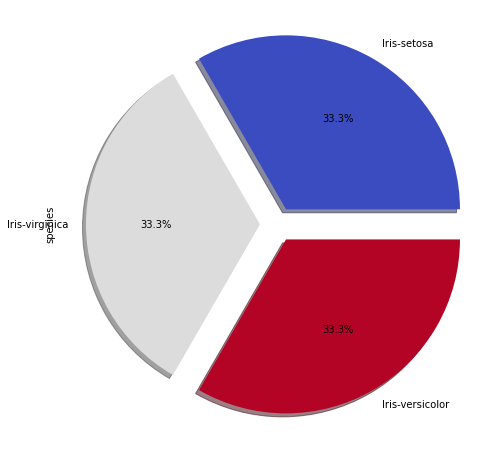

In [37]:
iris['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8),cmap="coolwarm")

 ### Pair Plot to visualize relationships
 A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables. With the species as hue we can **visibly see the relationship and differences** in the classes.

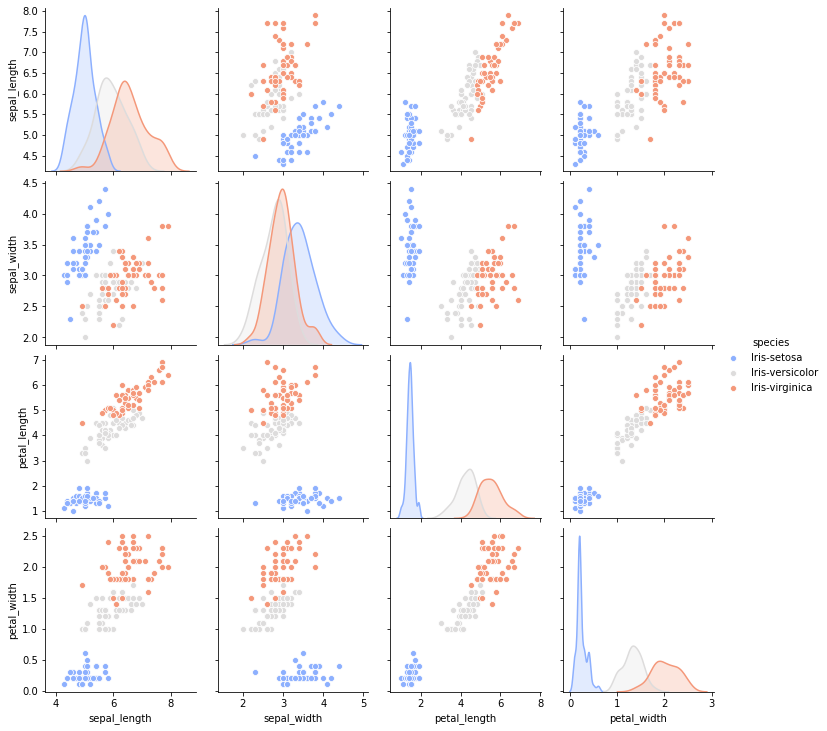

In [38]:
sns.pairplot(iris,hue='species',palette='coolwarm')

## Data Preparation and Training

In [18]:
# Separating the input variables from output variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]

#Splitting the train and test data
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

Importing and using the model

In [20]:
from sklearn.svm import SVC
model=SVC()
#Fitting the model on our training data 
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Perform sample prediction

In [24]:
test_sepal_length = 5.1
test_sepal_width = 3.5
test_petal_length = 1.4
test_petal_width = 0.2

prediction = model.predict([[test_sepal_length,test_sepal_width,test_petal_length,test_petal_width]])
print(prediction)

['Iris-setosa']


Perform prediction on all test data to use for model evaluation

In [25]:
y_pred = model.predict(x_test)

Constructing a confusion matrix for the output and visualizing it as a heatmap. The diagonal is in shade of red and hence it is evident that the model is performing well.

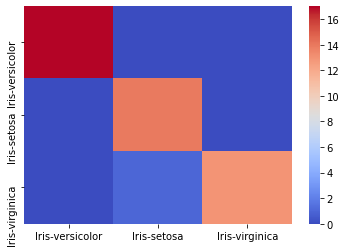

In [39]:
x = confusion_matrix(y_test,y_pred)
labels = ['Iris-versicolor','Iris-setosa','Iris-virginica']
sns.heatmap(x,xticklabels=labels,yticklabels=labels,linecolor='white',cmap="coolwarm")

Visualizing the classification report to analyze performance for every class. It includes parameters like 

- Precision
- Recall 
- F1 score

In [27]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

